# Importing Libraries

In [420]:
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import statsmodels.api as sm

# Reading the CSV file and checking the dataset

In [341]:
BikesData = pd.read_csv('day.csv')
pd.set_option('display.max_columns', None)
BikesData.head(7)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600
5,6,06-01-2018,1,0,1,0,6,0,1,8.378268,11.66045,51.8261,6.000868,88,1518,1606
6,7,07-01-2018,1,0,1,0,0,0,2,8.057402,10.44195,49.8696,11.304642,148,1362,1510


In [342]:
BikesData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


# Checking for unique values in categorical columns

### Checking for Seasons Column and changing it to (1-Spring, 2-Summer, 3-Fall, 4-Winter)

In [343]:
BikesData.season.value_counts()

3    188
2    184
1    180
4    178
Name: season, dtype: int64

In [344]:
BikesData.season[BikesData.season == 1] = 'Spring'
BikesData.season[BikesData.season == 2] = 'Summer'
BikesData.season[BikesData.season == 3] = 'Fall'
BikesData.season[BikesData.season == 4] = 'Winter'

### Checking for Months Column and changing it to (1-Jan, 2-Feb, 3-Mar, 4-Apr, 5-May, 6-June, 7-July, 8-Aug, 9-Sep, 10-Oct, 11-Nov, 12-Dec)

In [345]:
BikesData.mnth.value_counts()

1     62
3     62
5     62
7     62
8     62
10    62
12    62
4     60
6     60
9     60
11    60
2     56
Name: mnth, dtype: int64

In [346]:
BikesData.mnth[BikesData.mnth == 1] = 'Jan'
BikesData.mnth[BikesData.mnth == 2] = 'Feb'
BikesData.mnth[BikesData.mnth == 3] = 'Mar'
BikesData.mnth[BikesData.mnth == 4] = 'Apr'
BikesData.mnth[BikesData.mnth == 5] = 'May'
BikesData.mnth[BikesData.mnth == 6] = 'June'
BikesData.mnth[BikesData.mnth == 7] = 'July'
BikesData.mnth[BikesData.mnth == 8] = 'Aug'
BikesData.mnth[BikesData.mnth == 9] = 'Sep'
BikesData.mnth[BikesData.mnth == 10] = 'Oct'
BikesData.mnth[BikesData.mnth == 11] = 'Nov'
BikesData.mnth[BikesData.mnth == 12] = 'Dec'

In [347]:
BikesData.mnth.value_counts()

July    62
Dec     62
May     62
Aug     62
Oct     62
Mar     62
Jan     62
Sep     60
June    60
Nov     60
Apr     60
Feb     56
Name: mnth, dtype: int64

### Checking for Weekdays Column and changing it to (1-Monday, 2-Tuesday, 3-Wednesday, 4-Thursday, 5-Friday, 6-Saturday, 7-Sunday)

In [348]:
BikesData.weekday.value_counts()

1    105
2    105
0    104
3    104
4    104
5    104
6    104
Name: weekday, dtype: int64

In [349]:
BikesData.weekday[BikesData.weekday == 1] = 'Mon'
BikesData.weekday[BikesData.weekday == 2] = 'Tue'
BikesData.weekday[BikesData.weekday == 3] = 'Wed'
BikesData.weekday[BikesData.weekday == 4] = 'Thu'
BikesData.weekday[BikesData.weekday == 5] = 'Fri'
BikesData.weekday[BikesData.weekday == 6] = 'Sat'
BikesData.weekday[BikesData.weekday == 0] = 'Sun'

In [350]:
BikesData.weekday.value_counts()

Tue    105
Mon    105
Wed    104
Sun    104
Thu    104
Sat    104
Fri    104
Name: weekday, dtype: int64

### Checking for Weathersit Column and changing it to (1-Clear, 2-Cloudy, 3-LightRain, 4-HeavyRain)

In [351]:
BikesData.weathersit[BikesData.weathersit == 1] = 'Clear'
BikesData.weathersit[BikesData.weathersit == 2] = 'Cloudy'
BikesData.weathersit[BikesData.weathersit == 3] = 'LightRain'
BikesData.weathersit[BikesData.weathersit == 4] = 'HeavyRain'

In [352]:
BikesData.weathersit.value_counts()

Clear        463
Cloudy       246
LightRain     21
Name: weathersit, dtype: int64

### Checking for Year Column and changing it to (0-2018, 1-2019)

In [353]:
#BikesData.yr[BikesData.yr == 0] = 2018
#BikesData.yr[BikesData.yr == 1] = 2019


In [354]:
BikesData.yr.value_counts()

0    365
1    365
Name: yr, dtype: int64

In [355]:
#checking or overall data set 
BikesData.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,Spring,0,Jan,0,Mon,1,Cloudy,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,Spring,0,Jan,0,Tue,1,Cloudy,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,Spring,0,Jan,0,Wed,1,Clear,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,Spring,0,Jan,0,Thu,1,Clear,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,Spring,0,Jan,0,Fri,1,Clear,9.305237,11.46350,43.6957,12.522300,82,1518,1600


# Exploratory Data Analysis
- Checking null values
- Conversion into Date/Time
- Visualization of various variables

In [356]:
# Checking null values in weathersit
BikesData.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

No null values, thus we can proceed with further analysis of our data.

In [357]:
#converting the columns names
BikesData.rename(columns = {'yr' : 'year', 'mnth':'month','hum':'humidity','cnt':'count'}, inplace=True)
BikesData.head()

,instant,dteday,season,year,month,holiday,weekday,workingday,weathersit,temp,atemp,humidity,windspeed,casual,registered,count
0,1,01-01-2018,Spring,0,Jan,0,Mon,1,Cloudy,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,Spring,0,Jan,0,Tue,1,Cloudy,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,Spring,0,Jan,0,Wed,1,Clear,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,Spring,0,Jan,0,Thu,1,Clear,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,Spring,0,Jan,0,Fri,1,Clear,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [358]:
#Dropping instant , dteday , holiday , casual , registered
BikesData.drop(['instant','dteday','holiday','casual','registered'], axis=1, inplace=True)

In [359]:
BikesData.head()

,season,year,month,weekday,workingday,weathersit,temp,atemp,humidity,windspeed,count
0,Spring,0,Jan,Mon,1,Cloudy,14.110847,18.18125,80.5833,10.749882,985
1,Spring,0,Jan,Tue,1,Cloudy,14.902598,17.68695,69.6087,16.652113,801
2,Spring,0,Jan,Wed,1,Clear,8.050924,9.47025,43.7273,16.636703,1349
3,Spring,0,Jan,Thu,1,Clear,8.200000,10.60610,59.0435,10.739832,1562
4,Spring,0,Jan,Fri,1,Clear,9.305237,11.46350,43.6957,12.522300,1600


### Visualisation

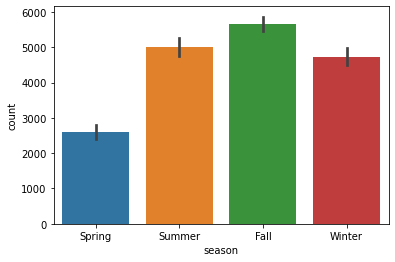

In [360]:
#Plotting Seasons vs  Count
sns.barplot('season','count',data=BikesData)
plt.show()

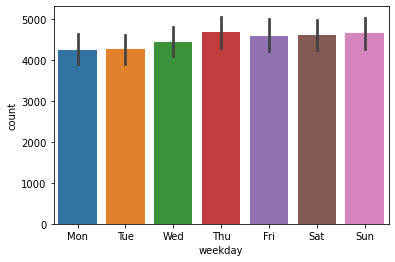

In [361]:
#Plotting Weekdays vs Count
sns.barplot('weekday','count',data=BikesData)
plt.show()

Wednesdays have high count,


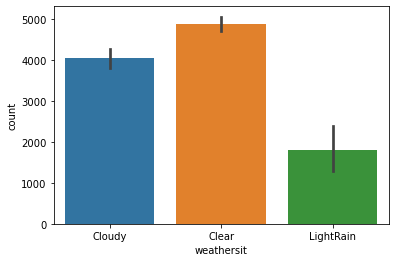

In [362]:
#Plotting Weathersit vs Count
sns.barplot('weathersit','count',data=BikesData)
plt.show()

We see that there's 0 count when the weather is having heavy rain or storms.

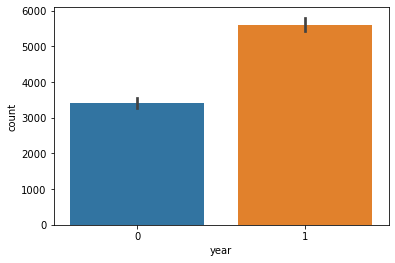

In [363]:
sns.barplot('year','count',data=BikesData)
plt.show()

As we can see the there's a significant difference in the count between 2018 and 2019.

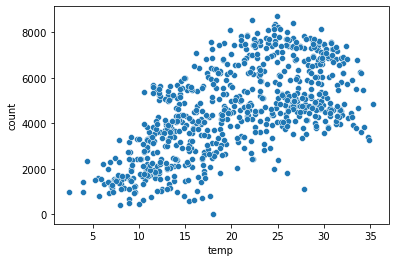

In [364]:
#Plotting temp vs count
sns.scatterplot('temp','count', data=BikesData)
plt.show()

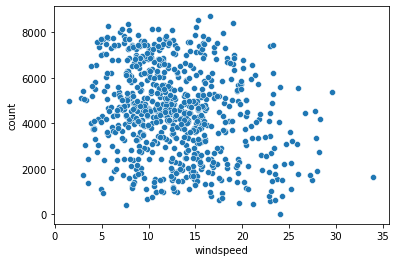

In [365]:
#Plotting windspeed vs count
sns.scatterplot('windspeed','count', data=BikesData)
plt.show()

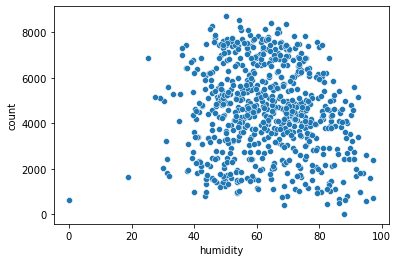

In [366]:
#Plotting humidity vs count
sns.scatterplot('humidity','count', data=BikesData)
plt.show()

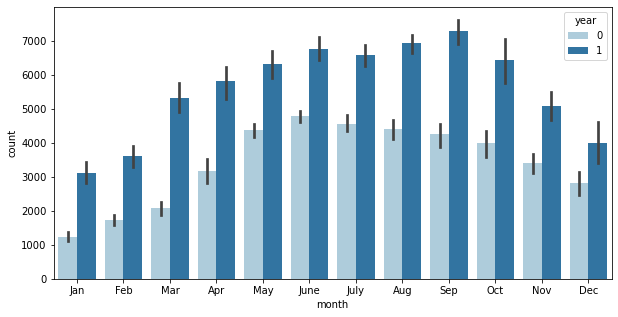

In [367]:
#Plotting Month, Year and Count
plt.figure(figsize=(10,5))
sns.barplot('month','count',hue='year',data=BikesData,palette='Paired')
plt.show()

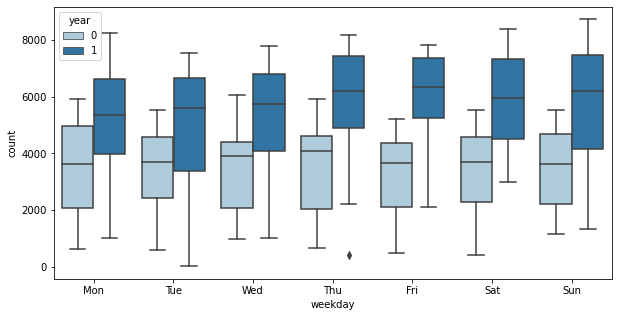

In [368]:
#Plotting Weekdays, Year and Count
plt.figure(figsize=(10,5))
sns.boxplot('weekday','count',hue='year',data=BikesData,palette='Paired')
plt.show()

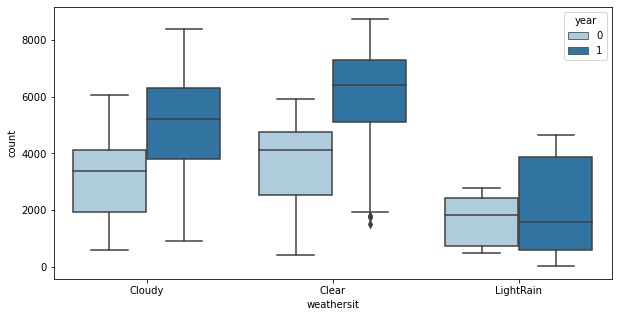

In [369]:
#Plotting Weathersit, Year and Count
plt.figure(figsize=(10,5))
sns.boxplot('weathersit','count',hue='year',data=BikesData,palette='Paired')
plt.show()

<Figure size 1440x1080 with 0 Axes>

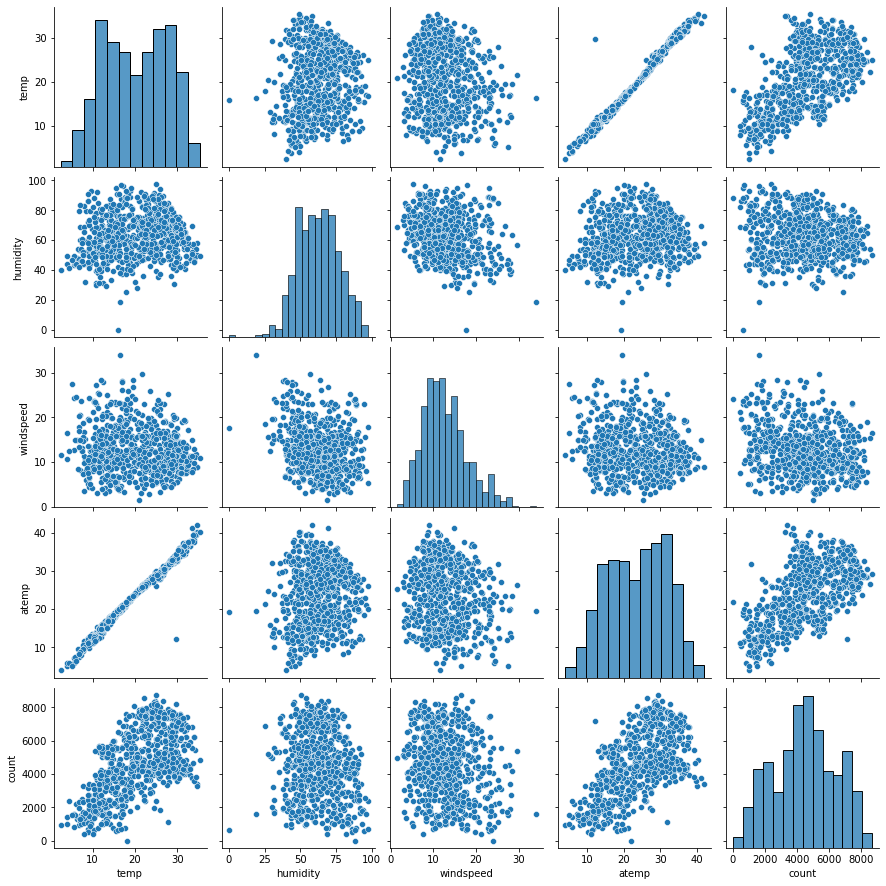

In [370]:
#Plotting numerical variables
plt.figure(figsize=(20, 15))
sns.pairplot(BikesData, vars=['temp', 'humidity','windspeed','atemp','count'])
plt.show()

## Correlation & Heatmap for variables

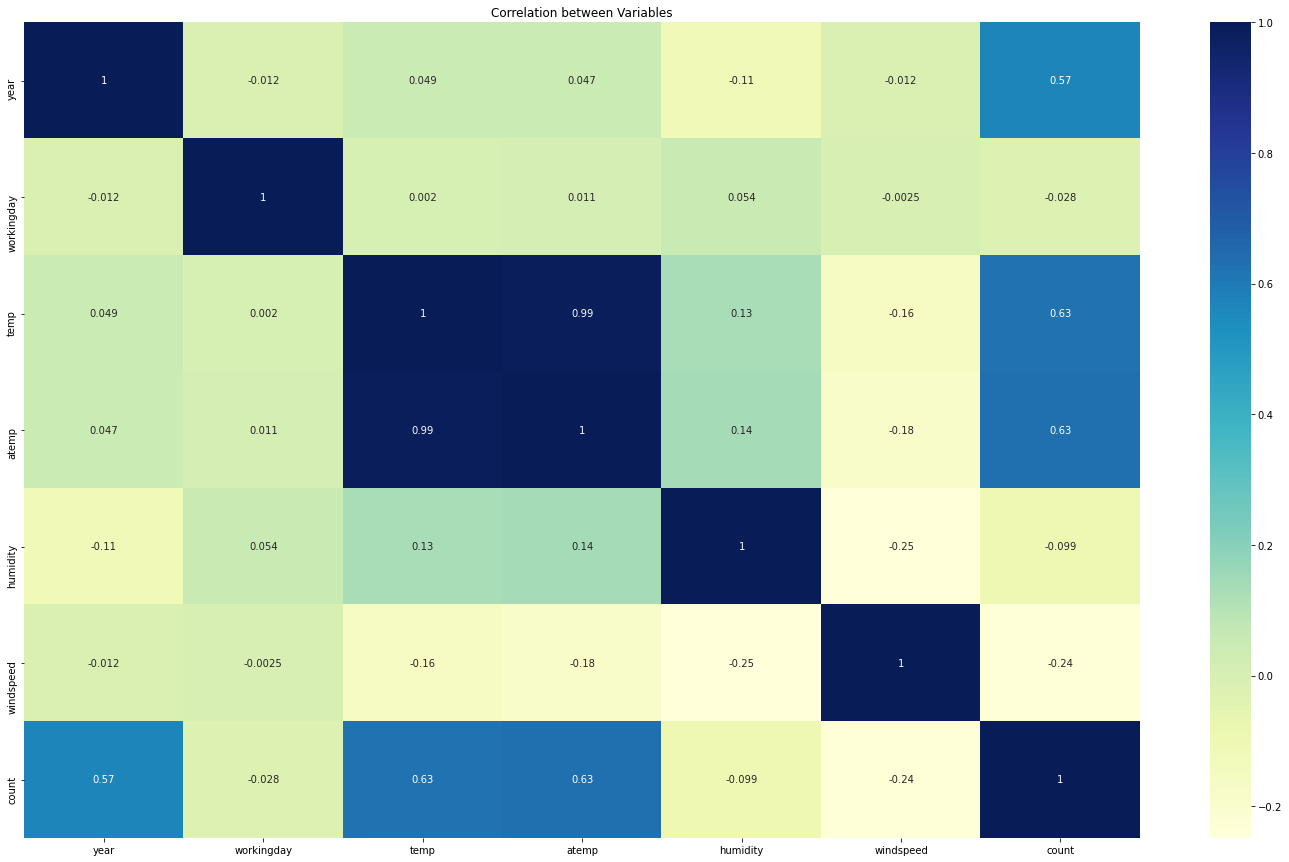

In [371]:
plt.figure(figsize=(25, 15))
sns.heatmap(BikesData.corr(), cmap='YlGnBu', annot = True)
plt.title("Correlation between Variables")
plt.show()

# Starting with Regression

## - Creating Dummy variables

In [372]:
#Creating the Dummy Variables for month, weekday, weathersit & season as month_dmy, weekday_dmy, weathersit_dmy & season_dmy respectively. 
month_dmy = pd.get_dummies(BikesData.month , drop_first=True)
weekday_dmy = pd.get_dummies(BikesData.weekday , drop_first=True)
weathersit_dmy = pd.get_dummies(BikesData.weathersit , drop_first=True)
season_dmy = pd.get_dummies(BikesData.season , drop_first=True)

In [373]:
#Joining the dummy variables
BikesData = pd.concat([month_dmy, weekday_dmy, weathersit_dmy, season_dmy, BikesData], axis=1)
BikesData.head()

,Aug,Dec,Feb,Jan,July,June,Mar,May,Nov,Oct,Sep,Mon,Sat,Sun,Thu,Tue,Wed,Cloudy,LightRain,Spring,Summer,Winter,season,year,month,weekday,workingday,weathersit,temp,atemp,humidity,windspeed,count
0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,Spring,0,Jan,Mon,1,Cloudy,14.110847,18.18125,80.5833,10.749882,985
1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,Spring,0,Jan,Tue,1,Cloudy,14.902598,17.68695,69.6087,16.652113,801
2,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,Spring,0,Jan,Wed,1,Clear,8.050924,9.47025,43.7273,16.636703,1349
3,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,Spring,0,Jan,Thu,1,Clear,8.200000,10.60610,59.0435,10.739832,1562
4,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,Spring,0,Jan,Fri,1,Clear,9.305237,11.46350,43.6957,12.522300,1600


In [374]:
#Dropping the original month, weekday, weathersit and season columns as teh dummies were created for them.
BikesData.drop(['season','month','weekday','weathersit'], axis = 1, inplace = True)
BikesData.head()

,Aug,Dec,Feb,Jan,July,June,Mar,May,Nov,Oct,Sep,Mon,Sat,Sun,Thu,Tue,Wed,Cloudy,LightRain,Spring,Summer,Winter,year,workingday,temp,atemp,humidity,windspeed,count
0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,1,14.110847,18.18125,80.5833,10.749882,985
1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,0,1,14.902598,17.68695,69.6087,16.652113,801
2,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,8.050924,9.47025,43.7273,16.636703,1349
3,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,8.200000,10.60610,59.0435,10.739832,1562
4,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,9.305237,11.46350,43.6957,12.522300,1600


In [375]:
#Checking the shape
BikesData.shape

(730, 29)

## - Splitting the data

In [376]:
from sklearn.model_selection import train_test_split

In [377]:
BikesData_train, BikesData_test = train_test_split(BikesData, train_size = 0.7, random_state = 100)

In [378]:
BikesData_train.shape

(510, 29)

In [379]:
BikesData_test.shape

(220, 29)

Data was split into 70-30 train test for model building purpose

## Scaling the data

### Using MinMax Scaling

In [380]:
# importing minmax scaler 
from sklearn.preprocessing import MinMaxScaler

In [381]:
#creating an object
bikes_scaler = MinMaxScaler()

In [382]:
#storing temp , humidity , windspeed & count as a list
numerical_vars=['temp','humidity','windspeed','count']

In [383]:
#Fitting on data
BikesData_train[numerical_vars] = bikes_scaler.fit_transform(BikesData_train[numerical_vars])
BikesData_train.head()

,Aug,Dec,Feb,Jan,July,June,Mar,May,Nov,Oct,Sep,Mon,Sat,Sun,Thu,Tue,Wed,Cloudy,LightRain,Spring,Summer,Winter,year,workingday,temp,atemp,humidity,windspeed,count
576,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0.815169,33.1448,0.725633,0.264686,0.827658
426,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,1,0,0.442393,20.6746,0.640189,0.255342,0.465255
728,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,1,0.245101,11.5850,0.498067,0.663106,0.204096
482,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,1,0,0.395666,18.8752,0.504508,0.188475,0.482973
111,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0.345824,16.0977,0.751824,0.380981,0.191095


In [384]:
#Checking the BikesData_train
BikesData_train.describe()

,Aug,Dec,Feb,Jan,July,June,Mar,May,Nov,Oct,Sep,Mon,Sat,Sun,Thu,Tue,Wed,Cloudy,LightRain,Spring,Summer,Winter,year,workingday,temp,atemp,humidity,windspeed,count
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.096078,0.084314,0.066667,0.088235,0.076471,0.076471,0.098039,0.084314,0.086275,0.084314,0.080392,0.154902,0.129412,0.137255,0.143137,0.152941,0.135294,0.345098,0.029412,0.243137,0.247059,0.247059,0.507843,0.711765,0.537440,23.500287,0.650480,0.320883,0.513499
std,0.294988,0.278131,0.249689,0.283915,0.266010,0.266010,0.297660,0.278131,0.281045,0.278131,0.272166,0.362166,0.335985,0.344454,0.350557,0.360284,0.342373,0.475867,0.169124,0.429398,0.431725,0.431725,0.500429,0.453386,0.225858,8.090963,0.145846,0.169803,0.224421
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.953480,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.339853,16.603063,0.538643,0.199179,0.356420
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.542596,24.131150,0.653714,0.296763,0.518638
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.735215,30.177700,0.754830,0.414447,0.684710
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,42.044800,1.000000,1.000000,1.000000


### Checking the correlation between the variables in train dataset

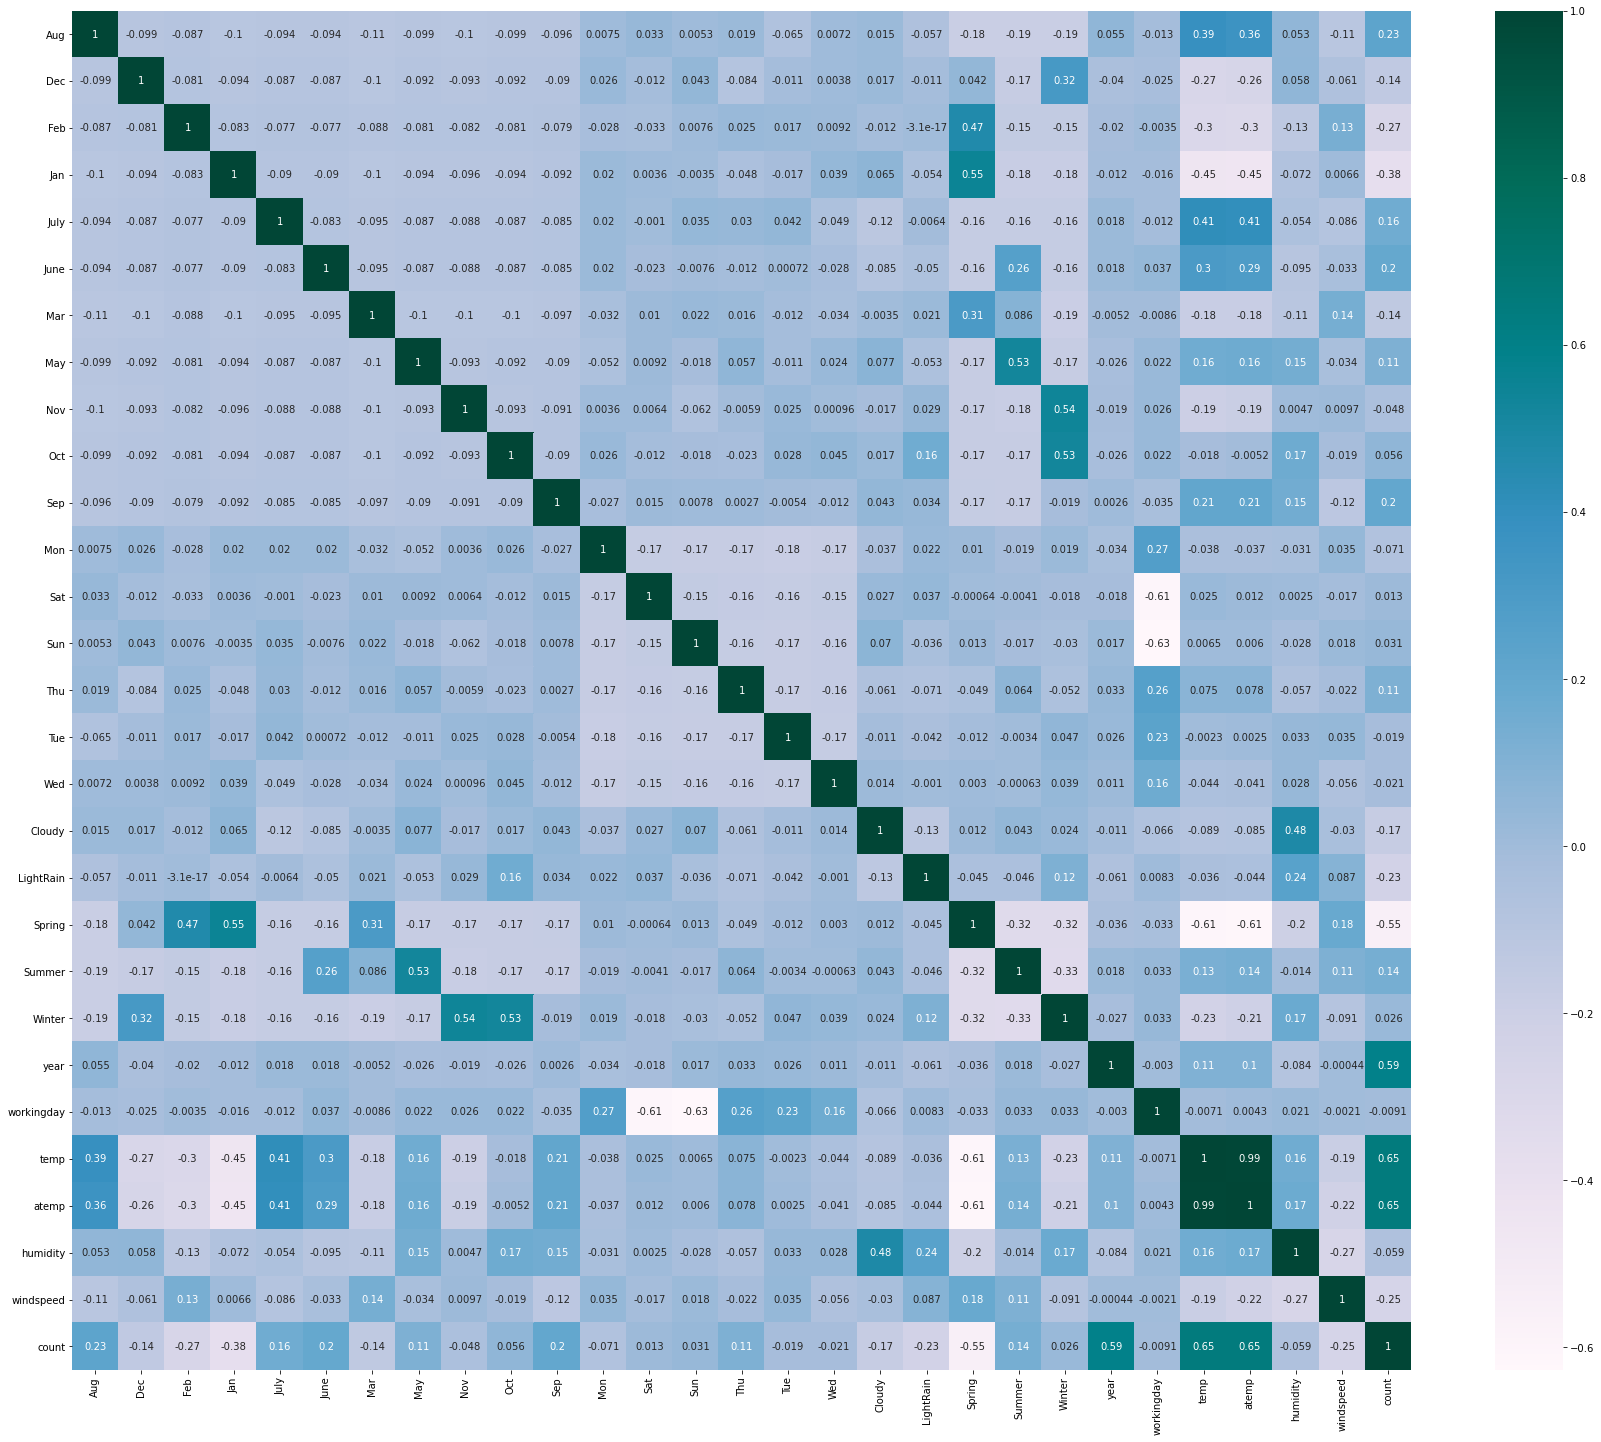

In [385]:
plt.figure(figsize=(30, 25))
sns.heatmap(BikesData_train.corr(),cmap='PuBuGn',annot = True)
plt.show()

We can see that the correlation between (year, temp & atemp) and  count is more than 0.5. That means they are correlated to count to some extent.

#### Dividing the train dataset into X & Y 

In [386]:
y_train = BikesData_train.pop('count')
X_train = BikesData_train

## Model Building (Linear Regression)

In [387]:
#importing libraries
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [388]:
#Representing Linear Regression as lm
lm = LinearRegression()
lm.fit(X_train, y_train)

LinearRegression()

In [389]:
# print(lm.intercept_)
# print(lm.coef_)

In [390]:
#checking RFE
rfe = RFE(lm, 15)
rfe = rfe.fit(X_train, y_train)

In [391]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('Aug', False, 8),
 ('Dec', False, 3),
 ('Feb', False, 4),
 ('Jan', True, 1),
 ('July', True, 1),
 ('June', False, 10),
 ('Mar', False, 14),
 ('May', False, 7),
 ('Nov', False, 2),
 ('Oct', False, 11),
 ('Sep', True, 1),
 ('Mon', False, 6),
 ('Sat', True, 1),
 ('Sun', True, 1),
 ('Thu', False, 12),
 ('Tue', False, 5),
 ('Wed', False, 9),
 ('Cloudy', True, 1),
 ('LightRain', True, 1),
 ('Spring', True, 1),
 ('Summer', True, 1),
 ('Winter', True, 1),
 ('year', True, 1),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('atemp', False, 13),
 ('humidity', True, 1),
 ('windspeed', True, 1)]

In [392]:
# Columns where RFE support is True
cols = X_train.columns[rfe.support_]
cols

Index(['Jan', 'July', 'Sep', 'Sat', 'Sun', 'Cloudy', 'LightRain', 'Spring',
       'Summer', 'Winter', 'year', 'workingday', 'temp', 'humidity',
       'windspeed'],
      dtype='object')

In [393]:
# Columns where RFE support is false
X_train.columns[~rfe.support_]

Index(['Aug', 'Dec', 'Feb', 'June', 'Mar', 'May', 'Nov', 'Oct', 'Mon', 'Thu',
       'Tue', 'Wed', 'atemp'],
      dtype='object')

### Building model further using statsmodel

In [394]:
X_train_rfe = X_train[cols]

In [395]:
# Adding constant 
X_train_rfe = sm.add_constant(X_train_rfe)

In [396]:
# Running the linear model 
lm = sm.OLS(y_train, X_train_rfe).fit()

In [397]:
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.843
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     176.8
Date:                Wed, 05 Jan 2022   Prob (F-statistic):          1.74e-187
Time:                        22:07:49   Log-Likelihood:                 511.01
No. Observations:                 510   AIC:                            -990.0
Df Residuals:                     494   BIC:                            -922.3
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2016      0.045      4.485      0.0

#### VIF check

In [398]:
#Dropping the constant term B0
X_train_rfe = X_train_rfe.drop(['const'], axis=1)

In [399]:
# Calculating the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
13,humidity,32.97
11,workingday,21.16
12,temp,20.31
7,Spring,5.10
14,windspeed,4.99
4,Sun,4.81
3,Sat,4.64
9,Winter,3.84
8,Summer,3.07
5,Cloudy,2.33


In [400]:
#Since Jan has high P value and low VIF so dropping Jan
#Drop January
X_train_new1 = X_train_rfe.drop(["Jan"], axis = 1)

In [401]:
#Building a model without Jan 
X_train_lm1 = sm.add_constant(X_train_new1)
lm1 = sm.OLS(y_train,X_train_lm1).fit()
print(lm1.summary())

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.842
Model:                            OLS   Adj. R-squared:                  0.837
Method:                 Least Squares   F-statistic:                     188.2
Date:                Wed, 05 Jan 2022   Prob (F-statistic):          7.16e-188
Time:                        22:07:49   Log-Likelihood:                 509.19
No. Observations:                 510   AIC:                            -988.4
Df Residuals:                     495   BIC:                            -924.9
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1893      0.045      4.246      0.0

In [402]:
#Drop the constant term B0
X_train_lm1 = X_train_lm1.drop(['const'], axis=1)

In [403]:
# Calculating the VIFs for the new model
vif = pd.DataFrame()
X = X_train_new1
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
12,humidity,32.35
10,workingday,20.95
11,temp,19.28
13,windspeed,4.97
6,Spring,4.87
3,Sun,4.77
2,Sat,4.60
8,Winter,3.78
7,Summer,3.06
4,Cloudy,2.33


In [404]:
#Dropping humidity as it has a very high VIF
X_train_new2 = X_train_lm1.drop(["humidity"], axis = 1)

In [405]:
#Building a model
X_train_lm2 = sm.add_constant(X_train_new2)
lm2 = sm.OLS(y_train,X_train_lm2).fit()
print(lm2.summary())

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.836
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     194.3
Date:                Wed, 05 Jan 2022   Prob (F-statistic):          5.10e-185
Time:                        22:09:58   Log-Likelihood:                 499.65
No. Observations:                 510   AIC:                            -971.3
Df Residuals:                     496   BIC:                            -912.0
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1050      0.041      2.569      0.0

In [406]:
#Dropping the constant
X_train_lm2=X_train_lm2.drop(['const'],axis=1)

In [407]:
vif = pd.DataFrame()
X = X_train_new2
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
10,workingday,18.16
11,temp,13.27
12,windspeed,4.80
3,Sun,4.32
2,Sat,4.17
6,Spring,3.93
8,Winter,2.94
7,Summer,2.80
9,year,2.07
0,July,1.60


In [410]:
#Dropping windspeed as windspeed seems to be insignificant,by looking at high VIF and negative correlation with count.
X_train_new3= X_train_lm2.drop(['windspeed'], axis=1)
#Build a model
X_train_lm3=sm.add_constant(X_train_new3)
lm3=sm.OLS(y_train,X_train_lm3).fit()
print(lm3.summary())

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.824
Model:                            OLS   Adj. R-squared:                  0.820
Method:                 Least Squares   F-statistic:                     193.9
Date:                Wed, 05 Jan 2022   Prob (F-statistic):          1.09e-178
Time:                        22:14:31   Log-Likelihood:                 481.85
No. Observations:                 510   AIC:                            -937.7
Df Residuals:                     497   BIC:                            -882.7
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0551      0.041      1.331      0.1

In [412]:
X_train_lm3= X_train_lm3.drop(['const'], axis=1)

In [413]:
vif = pd.DataFrame()
X =X_train_new3
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
10,workingday,17.44
11,temp,13.16
3,Sun,4.16
2,Sat,4.05
6,Spring,3.65
8,Winter,2.89
7,Summer,2.66
9,year,2.07
0,July,1.60
4,Cloudy,1.59


In [414]:
#Droppig July because of its P value & low VIF 
X_train_new4=X_train_lm3.drop(['July'], axis=1)

#Building a model
X_train_lm4= sm.add_constant(X_train_new4)
lm4=sm.OLS(y_train,X_train_lm4).fit()
print(lm4.summary())

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.821
Model:                            OLS   Adj. R-squared:                  0.817
Method:                 Least Squares   F-statistic:                     208.1
Date:                Wed, 05 Jan 2022   Prob (F-statistic):          2.95e-178
Time:                        22:18:36   Log-Likelihood:                 478.05
No. Observations:                 510   AIC:                            -932.1
Df Residuals:                     498   BIC:                            -881.3
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0476      0.042      1.146      0.2

In [416]:
#Drop the constant
X_train_lm5=X_train_lm4.drop(['const'],axis=1)

# Calculate the VIFs for the new model
vif = pd.DataFrame()
X = X_train_new4
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
9,workingday,17.31
10,temp,12.37
2,Sun,4.13
1,Sat,4.03
5,Spring,3.49
7,Winter,2.66
6,Summer,2.27
8,year,2.07
3,Cloudy,1.58
0,Sep,1.23


### Residual Ananlysis on Train data

In [419]:
X_train_lm4

,const,Sep,Sat,Sun,Cloudy,LightRain,Spring,Summer,Winter,year,workingday,temp
576,1.0,0,0,0,0,0,0,0,0,1,1,0.815169
426,1.0,0,0,1,1,0,1,0,0,1,0,0.442393
728,1.0,0,0,0,0,0,1,0,0,1,1,0.245101
482,1.0,0,0,1,1,0,0,1,0,1,0,0.395666
111,1.0,0,0,1,1,0,0,1,0,0,0,0.345824
...,...,...,...,...,...,...,...,...,...,...,...,...
578,1.0,0,0,0,0,0,0,0,0,1,1,0.863973
53,1.0,0,0,0,0,0,1,0,0,0,1,0.202618
350,1.0,0,0,0,1,0,0,0,1,0,1,0.248216
79,1.0,0,0,0,1,0,0,1,0,0,1,0.462664


In [422]:
# Predicted y train 
y_train_pred = lm4.predict(X_train_lm4)

<Figure size 432x288 with 0 Axes>

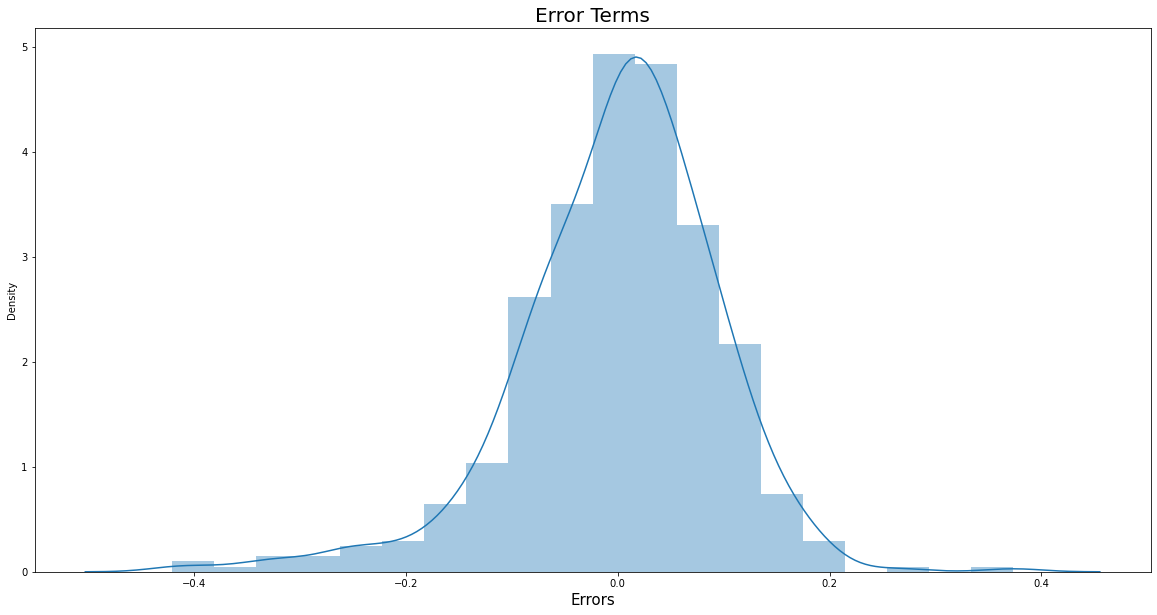

In [423]:
# Plotting the histogram of the error terms
fig = plt.figure()
plt.figure(figsize=(20,10))
sns.distplot((y_train - y_train_pred), bins = 20)

# Plot heading
plt.title('Error Terms', fontsize = 20)                   

# X-label
plt.xlabel('Errors', fontsize = 15)  
plt.show()

- We can find the error terms being normally distributed

### Making Predictions

In [425]:
#Creating a list of numeric variables
num_vars=['temp','humidity','windspeed','count']

#Fit on data
BikesData_test[num_vars] = bikes_scaler.transform(BikesData_test[num_vars])
BikesData_test.head()

,Aug,Dec,Feb,Jan,July,June,Mar,May,Nov,Oct,Sep,Mon,Sat,Sun,Thu,Tue,Wed,Cloudy,LightRain,Spring,Summer,Winter,year,workingday,temp,atemp,humidity,windspeed,count
184,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0.831783,33.27085,0.657364,0.084219,0.692706
535,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,1,0.901354,36.04875,0.610133,0.153728,0.712034
299,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0.511964,22.85230,0.837699,0.334206,0.303382
221,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0.881625,34.24915,0.437098,0.339570,0.547400
152,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0.817246,32.19710,0.314298,0.537414,0.569029


In [426]:
#Dividing into X_test and y_test
y_test = BikesData_test.pop('count')
X_test = BikesData_test
X_test.describe()

,Aug,Dec,Feb,Jan,July,June,Mar,May,Nov,Oct,Sep,Mon,Sat,Sun,Thu,Tue,Wed,Cloudy,LightRain,Spring,Summer,Winter,year,workingday,temp,atemp,humidity,windspeed
count,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000
mean,0.059091,0.086364,0.100000,0.077273,0.104545,0.095455,0.054545,0.086364,0.072727,0.086364,0.086364,0.118182,0.172727,0.154545,0.140909,0.122727,0.159091,0.318182,0.027273,0.254545,0.263636,0.236364,0.481818,0.640909,0.558718,24.250312,0.638221,0.313293
std,0.236333,0.281541,0.300684,0.267633,0.306665,0.294512,0.227609,0.281541,0.260281,0.281541,0.281541,0.323559,0.378873,0.362295,0.348721,0.328872,0.366595,0.466833,0.163248,0.436599,0.441609,0.425817,0.500809,0.480828,0.233187,8.281075,0.148694,0.159584
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.046591,4.941955,0.261915,-0.042808
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.355429,17.090025,0.529197,0.198843
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.558172,24.700000,0.625590,0.300126
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.755981,31.124313,0.743798,0.402718
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.984424,41.318550,1.002146,0.807474


In [428]:
#Columns
X_train_new4.columns

Index(['Sep', 'Sat', 'Sun', 'Cloudy', 'LightRain', 'Spring', 'Summer',
       'Winter', 'year', 'workingday', 'temp'],
      dtype='object')

In [429]:
# Using the model to make predictions.

# Creating X_test_new dataframe by dropping variables from X_test
X_test_new = X_test[X_train_new4.columns]

# Adding a constant variable 
X_test_new1 = sm.add_constant(X_test_new)
X_test_new1.head()

,const,Sep,Sat,Sun,Cloudy,LightRain,Spring,Summer,Winter,year,workingday,temp
184,1.0,0,0,0,1,0,0,0,0,0,0,0.831783
535,1.0,0,0,0,0,0,0,1,0,1,1,0.901354
299,1.0,0,1,0,1,0,0,0,1,0,0,0.511964
221,1.0,0,0,0,0,0,0,0,0,0,1,0.881625
152,1.0,0,1,0,0,0,0,1,0,0,0,0.817246


In [431]:
# Making predictions
y_pred = lm4.predict(X_test_new1)

#### Finding R squared value and adjusted R squared value

In [432]:
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.8111841599676117

In [433]:
#Adjusted R squared value
Adj_r2=1-(1-0.811184159)*(12-1)/(12-1-1)
print(Adj_r2)

0.7923025749


### Evaluating Model 

Text(0, 0.5, 'y_pred')

<Figure size 432x288 with 0 Axes>

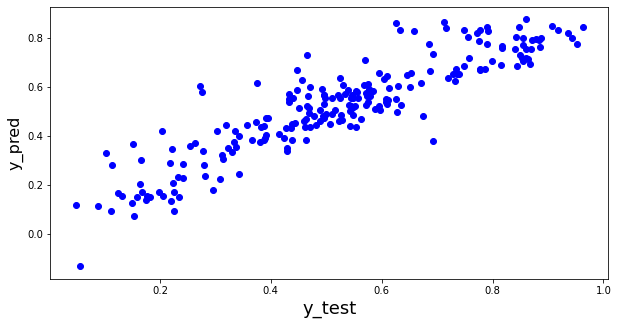

In [436]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.figure(figsize=(10,5))
plt.scatter(y_test,y_pred,color='blue')

# Plot heading
fig.suptitle('y_test vs y_pred', fontsize=20)

# X-label
plt.xlabel('y_test', fontsize=18)                          

# Y-label
plt.ylabel('y_pred', fontsize=16)                          

### Regression Plot

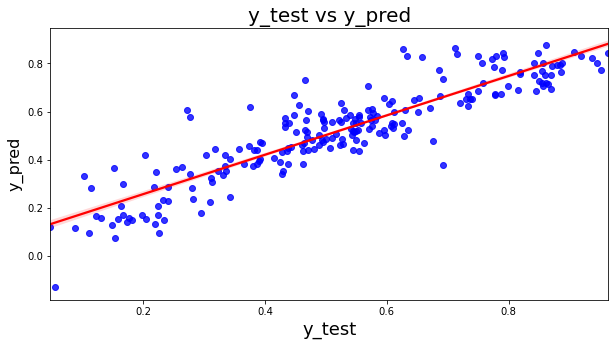

In [437]:
#Regression plot
plt.figure(figsize=(10,5))
sns.regplot(x=y_test, y=y_pred, ci=68, fit_reg=True,scatter_kws={"color": "blue"}, line_kws={"color": "red"})

# Plot heading
plt.title('y_test vs y_pred', fontsize=20)               

# X-label
plt.xlabel('y_test', fontsize=18)   

# Y-label
plt.ylabel('y_pred', fontsize=16)                          
plt.show()

#### We can see that the equation of our best fitted line is:

- count = 0.4911(temp) + 0.0953(September) + 0.1038(Saturday) + 0.1072(sunday) + 0.0537(summer) + 0.0957(winter) + 0.2338(Year) + 0.0865(workingday) − 0.2986(lightrain) − 0.0777(cloudy) − 0.0638(spring) 

## Comparison Between Train and Test models

- Train R^2 = 0.821

- Test R^2 = 0.8111

- Train Adj. R^2 = 0.817

- Test Adj. R^2 = 0.792

- Diff between Train-Test R^2 = 0.0099

- Diff between Train-Test Adj, R^2 = 0.025 (less than 5%)

#### Model is good 






- Found out a decent model for the the demand for shared bikes with the significant variables
- Demand for bikes was more in 2019 than 2018
- We also has some negative coefficients for lightrain, cloudy and spring 